# This script produces visualisations of a number of different aspects about the instacart dataset based on ad-hoc stakeholder requests

## The script contains the following sections
### 1. Importing libraries
### 2. Importing Data
### 3. Creating Sample for use in Analyses
### 4. Creating Visualisations

# 1. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.ticker import FuncFormatter

# 2. Importing Data

In [2]:
# Folder Shortcut
path = r'C:\Users\seank\OneDrive\Dokumente\Career Foundry Data Analytics Course\Data Immersion\4 Python\03-2020_Instacart_Basket _Analysis'

In [3]:
# Importing Merged Orders Products Data
ords_prods_cust = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'ords_prods_cust.pkl'))

# 3. Creating subsample for analysis to allow system-heavy graphs

In [4]:
# Creating List holding true/false values of test random.rand <= 0.7
np.random.seed(123)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [5]:
# Creating two subsamples, big with 70% of obs, small with 30%
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [6]:
small.shape

(9719039, 27)

# 4. Visualisations

Reducing size of DF so plots will run

In [7]:
# Keeping only relevant variables
df_plot = small[['user_id', 'order_id', 'orders_day_of_week', 'prices', 'order_hour_of_day',
'loyalty_flag', 'age', 'n_dependants', 'income']]

In [8]:
# Labels for days of week
day_labels = {0: "Sat", 1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri"}

Bar Chart

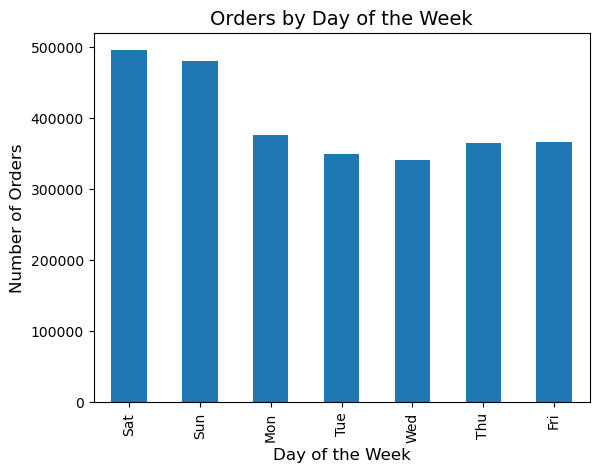

In [9]:
# Bar plot of number of orders per day of week
bar = ( df_plot.groupby('orders_day_of_week')['order_id'].nunique()
       .plot.bar())

# update labels so easier to read
bar.set_xticklabels([day_labels[i] for i in sorted(df_plot["orders_day_of_week"].unique())])

# Add titles and labels with line breaks
bar.set_title('Orders by Day of the Week', fontsize=14)
bar.set_xlabel('Day of the Week', fontsize=12)
bar.set_ylabel('Number of Orders', fontsize=12)

plt.show()

In [10]:
df_plot.head()

,user_id,order_id,orders_day_of_week,prices,order_hour_of_day,loyalty_flag,age,n_dependants,income
4,26711,2524893,3,7.1,11,New customer,48,3,165665
6,26711,2984525,1,4.3,17,New customer,48,3,165665
11,26711,2505178,1,12.6,8,New customer,48,3,165665
15,26711,2578584,1,12.6,15,New customer,48,3,165665
21,33890,2135662,6,5.5,17,Regular customer,36,0,59285


In [11]:
# Saving
bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_orders_dow.png'))

Histogram

Text(0.5, 0, 'Price in USD')

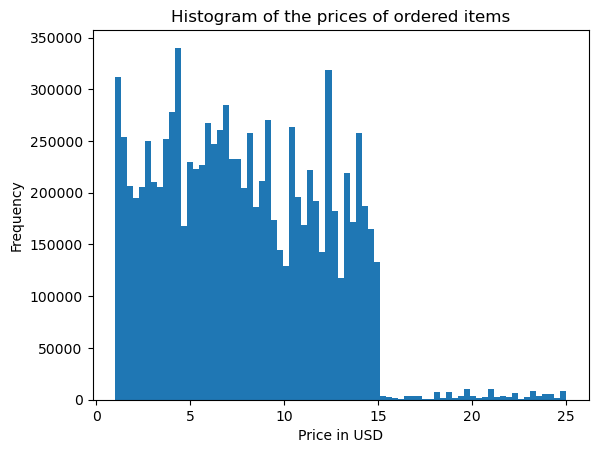

In [12]:
# Histogram showing distribution of the prices of items ordered
hist_price = df_plot['prices'].plot.hist(bins = 75)

hist_price.set_title('Histogram of the prices of ordered items')
hist_price.set_xlabel('Price in USD')

In [13]:
# Saving
hist_price.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'hist_prices.png'))

# Analyses for Stakeholders

In [17]:
# Creating reduced-variables dataframe to run analyses on full sample
df_analyses = ords_prods_cust[['user_id', 'order_id', 'orders_day_of_week', 'prices', 'order_hour_of_day',
'loyalty_flag', 'age', 'n_dependants', 'income']]

Stakeholders requested descriptive findings about the hours of the day of sales

## Histogram of hour of the day

Text(0, 0.5, 'Number of products ordered')

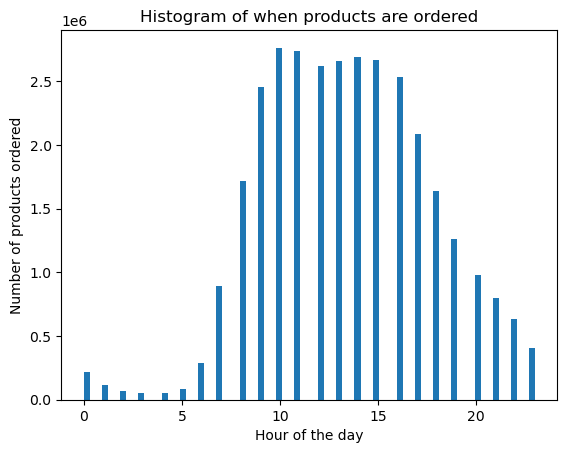

In [ ]:
# Histogram showing distribution of the prices of items ordered
hist_hour = df_analyses['order_hour_of_day'].plot.hist(bins = 75)

hist_hour.set_title('Histogram of when products are ordered')
hist_hour.set_xlabel('Hour of the day')
hist_hour.set_ylabel('Number of products ordered')

The histogram shows that there are very few orders in the nighttime hours, then they slowly begin at 7/8 am. From 9 am until 4 pm is peak ordering time with a consistently high number of orders during this period. Then it starts to reduce gradually from 17h and as the evening goes on

Marketing team is curious about the distribution of orders among customers in terms of loyalty

## Bar Chart of loyal customers breakdown

Text(0.5, 0, 'Customer Groups (# orders)')

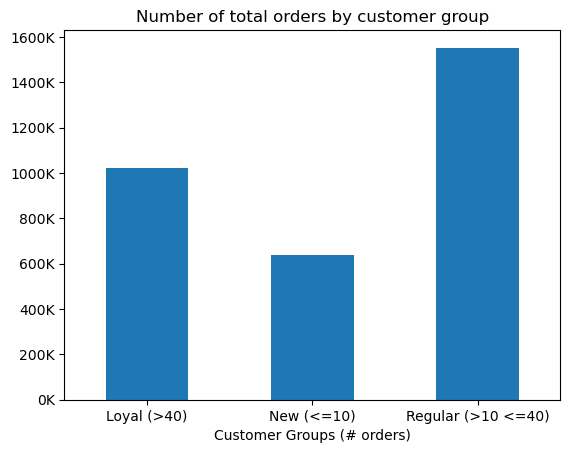

In [ ]:
# bar chart with reformatted y-axis. Counting unique order_ids so we're counting number of orders, rather than number of products ordered
# Define a formatter function for the y-axis
def format_yaxis(value, tick_number):
    return f'{int(value / 1000)}K'

bar_loyal = ( df_analyses.groupby('loyalty_flag')['order_id']
             .nunique()
             .plot.bar() )
bar_loyal.set_title('Number of total orders by customer group')

# Apply the custom formatter to the y-axis
bar_loyal.yaxis.set_major_formatter(FuncFormatter(format_yaxis))

# Including definitions in x axis
bar_loyal.set_xticklabels(['Loyal (>40)', 'New (<=10)', 'Regular (>10 <=40)'],
                          rotation=0)

bar_loyal.set_xlabel("Customer Groups (# orders)")

In [28]:
# Saving
bar_loyal.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_loyalty.png'))

We can see the most number of orders are actually placed by 'regular customers' with just under 1.6 million. Next are the loyal group with just over 1M, then the new customers with around 600K

Checking if there is difference in expenditure by time of day

## Line chart of expenditure over the course of the day

In [29]:
# Creating subsample to make line chart
    # random sample of 30% of all rows
df_line = small[['order_hour_of_day', 'prices']]

Text(0, 0.5, 'Average Price of Items Ordered')

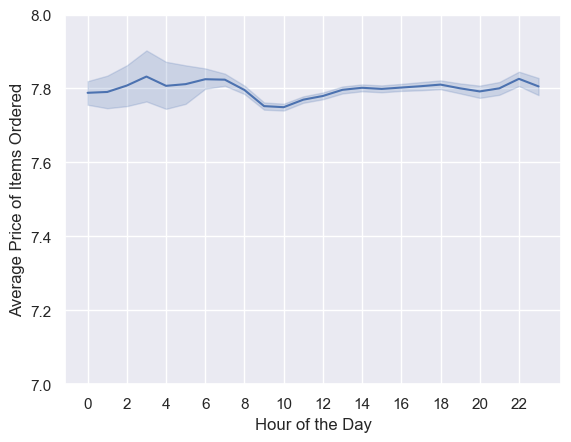

In [ ]:
# Creating  line chart
sns.set_theme()    # Changing theme so the x axis values easier to see
line_prices_hour = sns.lineplot(data = df_line, 
                    x = 'order_hour_of_day',
                    y = 'prices')
# Setting range of y axis
line_prices_hour.set_ylim(7, 8) 
# Every second value of hour so plot easier to read
line_prices_hour.set_xticks(range(0, len(df_line['order_hour_of_day'].unique()), 2)) 
line_prices_hour.set_xlabel('Hour of the Day')
line_prices_hour.set_ylabel('Average Price of Items Ordered')

In [36]:
# Saving
line_prices_hour.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_prices_hour.png'))

This chart shows that the average price of items ordered is very consistent across the span of a day, only ranging from 7.74 to 7.9. There is a slight dip between 9am and noon. We also see that there is more statistical uncertainty of the estimates between midnight and 7am

Determining whether there’s a connection between age and family situation and between age and spending power (income).

## Line Chart looking at relationship between Age and Number of Dependents


In [38]:
# First creating subsample for plotting, only keeping unique users
df_age_fam = small.drop_duplicates(subset='user_id')[['age', 'n_dependants']]


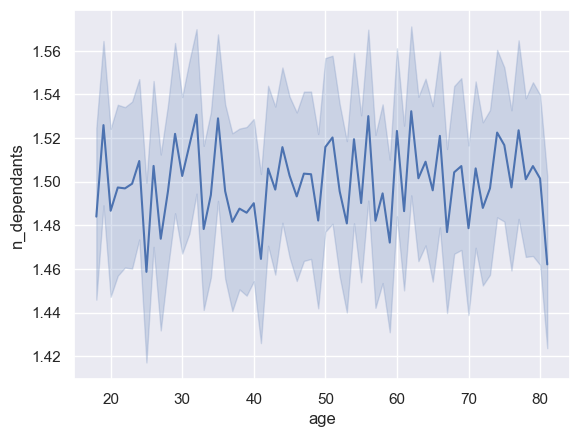

In [39]:
# Creating line plot
line_age_fam = sns.lineplot(data = df_age_fam,
                            x = 'age',
                            y = 'n_dependants')

In [40]:
# Saving
line_age_fam.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_age_fam.png'))

We can see that there is no strong relationship between age and number of dependents. The average value of number of dependants only moves within a very small range (around 1.46 - 1.53)

## Investigating relationship between Age and income

In [ ]:
# Creating df with only necessary variables and only counting each user once
df_age_inc = ords_prods_cust.drop_duplicates(subset='user_id')[['age', 'income']]

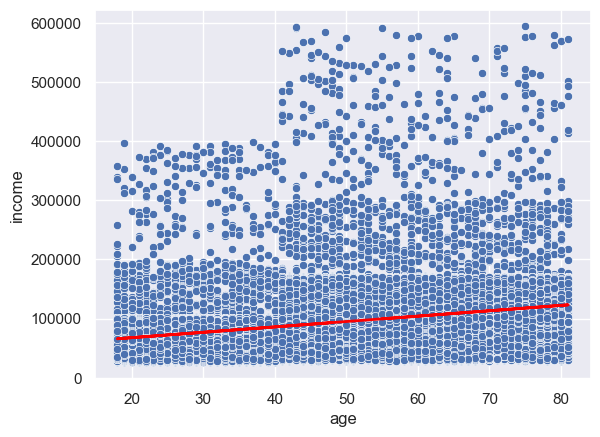

In [ ]:
# Scatter plot of age and income
scatter_age_inc = sns.scatterplot(data = df_age_inc,
                                  x = 'age',
                                  y = 'income')

# Compute regression line with numpy
x_vals = df_age_inc['age']
y_vals = df_age_inc['income']
m, b = np.polyfit(x_vals, y_vals, 1)  # Linear regression (y = mx + b)

# Add regression line to help bring out relationship on busy graph
plt.plot(x_vals, m * x_vals + b, color="red", linewidth=2)


In [44]:
# Saving
scatter_age_inc.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'scatter_age_inc.png'))

the plot shows that there is a weak positive relationship between age and income. There is a large amount of users under 200k income. Visually we can see that from the age of 40 onwards, there are more people with incomes higher than this. Particularly in the 400k plus group, only people over 40 have achieved this